### Importação dos dados



In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [27]:
faturamento_loja1 = round(sum(loja['Preço']), 2)
faturamento_loja2 = round(sum(loja2['Preço']), 2)
faturamento_loja3 = round(sum(loja3['Preço']), 2)
faturamento_loja4 = round(sum(loja4['Preço']), 2)

In [28]:
print(faturamento_loja1)
print(faturamento_loja2)
print(faturamento_loja3)
print(faturamento_loja4)

1534509.12
1488459.06
1464025.03
1384497.58


# 2. Vendas por Categoria


In [29]:
def vendas_por_categoria(loja):
  categorias = loja['Categoria do Produto']
  contagem = {}

  for categoria in categorias:
    if categoria in contagem:
      contagem[categoria] += 1
    else:
      contagem[categoria] = 1
  return contagem

vendas_loja1 = vendas_por_categoria(loja)
vendas_loja2 = vendas_por_categoria(loja2)
vendas_loja3 = vendas_por_categoria(loja3)
vendas_loja4 = vendas_por_categoria(loja4)


In [5]:
print(vendas_loja1)
print(vendas_loja2)
print(vendas_loja3)
print(vendas_loja4)

{'eletronicos': 448, 'moveis': 465, 'brinquedos': 324, 'eletrodomesticos': 312, 'utilidades domesticas': 171, 'esporte e lazer': 284, 'livros': 173, 'instrumentos musicais': 182}
{'moveis': 442, 'instrumentos musicais': 224, 'esporte e lazer': 275, 'eletronicos': 422, 'utilidades domesticas': 181, 'brinquedos': 313, 'eletrodomesticos': 305, 'livros': 197}
{'eletrodomesticos': 278, 'moveis': 499, 'instrumentos musicais': 177, 'esporte e lazer': 277, 'eletronicos': 451, 'brinquedos': 315, 'utilidades domesticas': 177, 'livros': 185}
{'eletrodomesticos': 254, 'moveis': 480, 'esporte e lazer': 277, 'livros': 187, 'eletronicos': 451, 'instrumentos musicais': 170, 'brinquedos': 338, 'utilidades domesticas': 201}


# 3. Média de Avaliação das Lojas

In [6]:
def media_avaliacao(loja):
  media = sum(loja['Avaliação da compra']) / len(loja['Avaliação da compra'])
  return media

media_avaliacao_loja1 = round(media_avaliacao(loja), 2)
media_avaliacao_loja2 = round(media_avaliacao(loja2), 2)
media_avaliacao_loja3 = round(media_avaliacao(loja3), 2)
media_avaliacao_loja4 = round(media_avaliacao(loja4), 2)

In [7]:
print(media_avaliacao_loja1)
print(media_avaliacao_loja2)
print(media_avaliacao_loja3)
print(media_avaliacao_loja4)

3.98
4.04
4.05
4.0


# 4. Produtos Mais e Menos Vendidos

In [8]:
def produto_mais_vendido(vendas):
  mais_vendido = None
  qtd_mais_vendido = 0

  for categorias, vendas in vendas.items():
    if vendas > qtd_mais_vendido:
      qtd_mais_vendido = vendas
      mais_vendido = categorias
  return mais_vendido, qtd_mais_vendido

def produto_menos_vendido(vendas):
  menos_vendido = None
  qtd_menos_vendido = float('inf')

  for categorias, vendas in vendas.items():
    if vendas < qtd_menos_vendido:
      qtd_menos_vendido = vendas
      menos_vendido = categorias
  return menos_vendido, qtd_menos_vendido

mais_vendido_loja1, qtd_mais_vendido_loja1 = produto_mais_vendido(vendas_loja1)
menos_vendido_loja1, qtd_menos_vendido_loja1 = produto_menos_vendido(vendas_loja1)

mais_vendido_loja2, qtd_mais_vendido_loja2 = produto_mais_vendido(vendas_loja2)
menos_vendido_loja2, qtd_menos_vendido_loja2 = produto_menos_vendido(vendas_loja2)

mais_vendido_loja3, qtd_mais_vendido_loja3 = produto_mais_vendido(vendas_loja3)
menos_vendido_loja3, qtd_menos_vendido_loja3 = produto_menos_vendido(vendas_loja3)

mais_vendido_loja4, qtd_mais_vendido_loja4 = produto_mais_vendido(vendas_loja4)
menos_vendido_loja4, qtd_menos_vendido_loja4 = produto_menos_vendido(vendas_loja4)

In [9]:
print(f"{mais_vendido_loja1} : {qtd_mais_vendido_loja1}")
print(f"{menos_vendido_loja1} : {qtd_menos_vendido_loja1}")

print(f"{mais_vendido_loja2} : {qtd_mais_vendido_loja2}")
print(f"{menos_vendido_loja2} : {qtd_menos_vendido_loja2}")

print(f"{mais_vendido_loja3} : {qtd_mais_vendido_loja3}")
print(f"{menos_vendido_loja3} : {qtd_menos_vendido_loja3}")

print(f"{mais_vendido_loja4} : {qtd_mais_vendido_loja4}")
print(f"{menos_vendido_loja4} : {qtd_menos_vendido_loja4}")

moveis : 465
utilidades domesticas : 171
moveis : 442
utilidades domesticas : 181
moveis : 499
instrumentos musicais : 177
moveis : 480
instrumentos musicais : 170


# 5. Frete Médio por Loja



In [10]:
def frete_medio(loja):
  frete_medio = sum(loja['Frete']) / len(loja['Frete'])
  return frete_medio

frete_medio_loja1 = round(frete_medio(loja), 2)
frete_medio_loja2 = round(frete_medio(loja2), 2)
frete_medio_loja3 = round(frete_medio(loja3), 2)
frete_medio_loja4 = round(frete_medio(loja4), 2)

In [11]:
print(frete_medio_loja1)
print(frete_medio_loja2)
print(frete_medio_loja3)
print(frete_medio_loja4)

34.69
33.62
33.07
31.28


#6. Gráficos

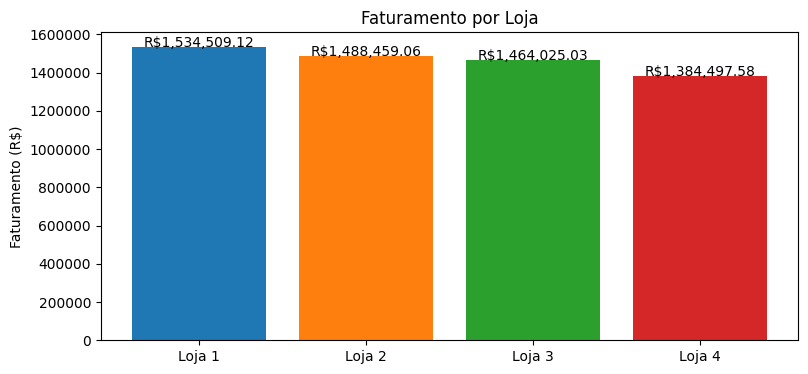

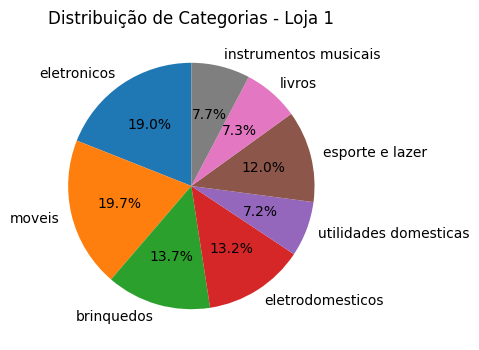

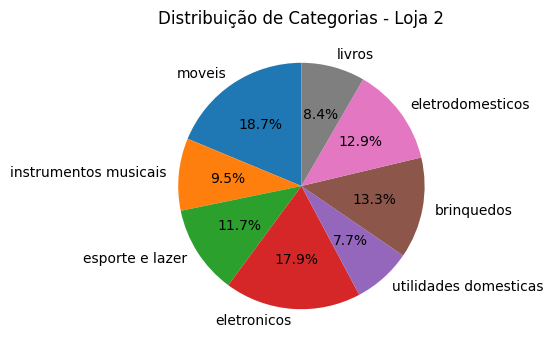

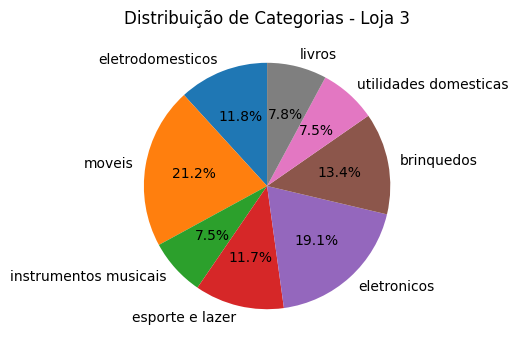

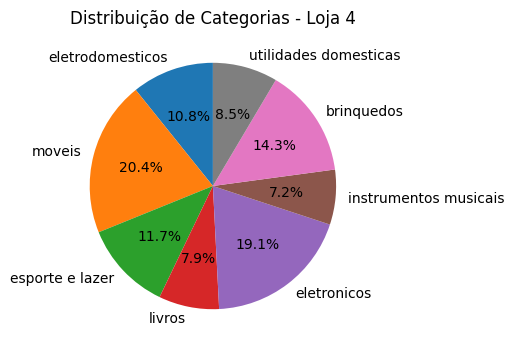

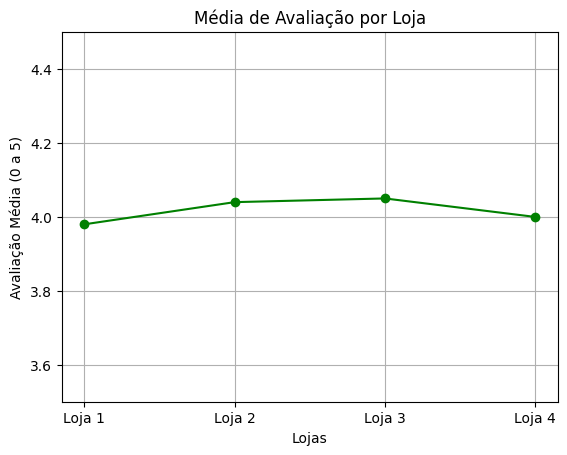

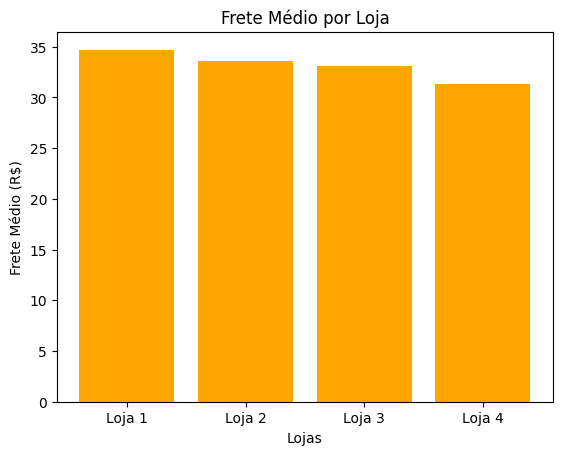

In [12]:
import matplotlib.pyplot as plt

#Gráfico de Barras - Faturamento por Loja

faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(9, 4))
plt.bar(lojas, faturamentos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.ticklabel_format(axis='y', style='plain')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')

for i in range(len(faturamentos)):
  valor = faturamentos[i]
  plt.text(i, valor + 100, f'R${valor:,.2f}', ha='center')
plt.show()

#Gráfico de Pizza - Distribuição de Categorias
#Loja 1
categorias = list(vendas_loja1.keys())
quantidades = list(vendas_loja1.values())

plt.figure(figsize=(4, 4))
plt.pie(quantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias - Loja 1')
plt.show()

#Loja 2
categorias = list(vendas_loja2.keys())
quantidades = list(vendas_loja2.values())

plt.figure(figsize=(4, 4))
plt.pie(quantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias - Loja 2')
plt.show()

#Loja 3
categorias = list(vendas_loja3.keys())
quantidades = list(vendas_loja3.values())

plt.figure(figsize=(4, 4))
plt.pie(quantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias - Loja 3')
plt.show()

#Loja 4
categorias = list(vendas_loja4.keys())
quantidades = list(vendas_loja4.values())

plt.figure(figsize=(4, 4))
plt.pie(quantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias - Loja 4')
plt.show()


#Gráfico 3 - Avaliação média das lojas

avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.plot(lojas, avaliacoes, marker='o', linestyle='-', color='green')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Avaliação Média (0 a 5)')
plt.xlabel('Lojas')
plt.ylim(3.5, 4.5)
plt.grid(True)
plt.show()

#Gráfico 4 - Frete médio das lojas

fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

import matplotlib.pyplot as plt

plt.bar(lojas, fretes, color='orange')
plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('Lojas')
plt.show()



#**Relatório**

Ao verificar as comparações feitas entre as lojas, concluiu-se que:
- Faturamento total: a loja 4 apresentou o menor faturamento, com uma diferença de R$ 79.527,45 em comparação com a loja 3, que apresentou o 2° pior faturamento.
- Vendas por categoria: todas as lojas apresentaram diversidade nas vendas, dando destaque a categoria de móveis que é a mais vendida em todas as lojas.
- Média de avaliação das lojas: em uma escala de notas de 0 a 5, a loja 4 apresentou a 2° pior média de avaliação dos clientes, com uma média de 4.
- Frete médio: nesse parâmetro, a loja 4 apresentou o menor frete médio. Todavia, isso não contribuiu em melhora no faturamento e nas avaliações.

#**Conclusão**

Dessa forma, o Sr. João deverá vender a loja 4, uma vez que essa apresentou o pior desempenho em 2 importantes categorias.

